In [8]:
from __future__ import print_function, absolute_import
from Tools.Tushare_apidata import *
from Tools.Test import *
import tushare as ts
from gm.api import *
print(ts.__version__)
import pandas as pd
os.chdir(r'D:\Code\自研策略\打板策略\Tools\Historydata')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1.4.21


In [9]:
Method_name='策略3'
Stocknum=5
loss_benchmark=-0.15
Test_Real='Real'
# Test_Real='Test'

WinPct=pd.read_csv(rf'Result/WinPct/{Method_name}_T1opentoT2close_{Stocknum}_0.001_{loss_benchmark}.csv')
# WinPct=pd.read_csv(rf'Result/WinPct/{Method_name}_T12close_{Stocknum}_0.001_{loss_benchmark}.csv')

if Test_Real=='Test':
    WinPct=WinPct.loc[(WinPct['date']>20230525)&(WinPct['date']<20250525)]
elif Test_Real=='Real':
    WinPct=WinPct.loc[(WinPct['date']>20250525)]


CalWinPct=WinPct['winpct'].mean()
avgrtn=WinPct['avgrtn'].mean()
Win=WinPct.loc[WinPct['avgrtn']>0,['avgrtn']].mean()[0]
Fail=WinPct.loc[WinPct['avgrtn']<0,['avgrtn']].mean()[0]
WinFail=abs(Win/Fail)
WinNum=len(WinPct.loc[WinPct['avgrtn']>0,['avgrtn']])
FailNum=len(WinPct.loc[WinPct['avgrtn']<0,['avgrtn']])
WinPctNum=WinNum/(FailNum+WinNum)
# rewinpct=WinPct['rewinpct'].mean()
# rertn=WinPct['rertn'].mean()
# print('胜率:',CalWinPct,'平均收益:',avgrtn,'相对胜率:',rewinpct,'相对收益:',rertn)
print('平均日胜率:',CalWinPct,'平均收益:',avgrtn,'盈亏比:',WinFail,'胜率:',WinPctNum)
BackTest=WinPct.copy()


平均日胜率: 0.4675000000000001 平均收益: 0.009251755600266658 盈亏比: 1.1448833844380144 胜率: 0.5833333333333334


In [10]:
# 代码块1：导入库和设置

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 代码块2：处理日期格式
BackTest['date'] = pd.to_datetime(BackTest['date'], format='%Y%m%d')
print("日期格式转换完成")
print(BackTest.head())

# 代码块3：计算累计收益
BackTest['cumulative_returns'] = (1 + BackTest['avgrtn']).cumprod() - 1
BackTest['cumulative_returns_pct'] = BackTest['cumulative_returns'] * 100

日期格式转换完成
     Unnamed: 0       date  winpct      avgrtn
234           0 2025-05-26     0.6  0.01379240
235           0 2025-05-27     0.8  0.05237626
236           0 2025-05-28     0.4 -0.03336969
237           0 2025-05-29     0.2 -0.01355248
238           0 2025-05-30     0.6  0.01621805


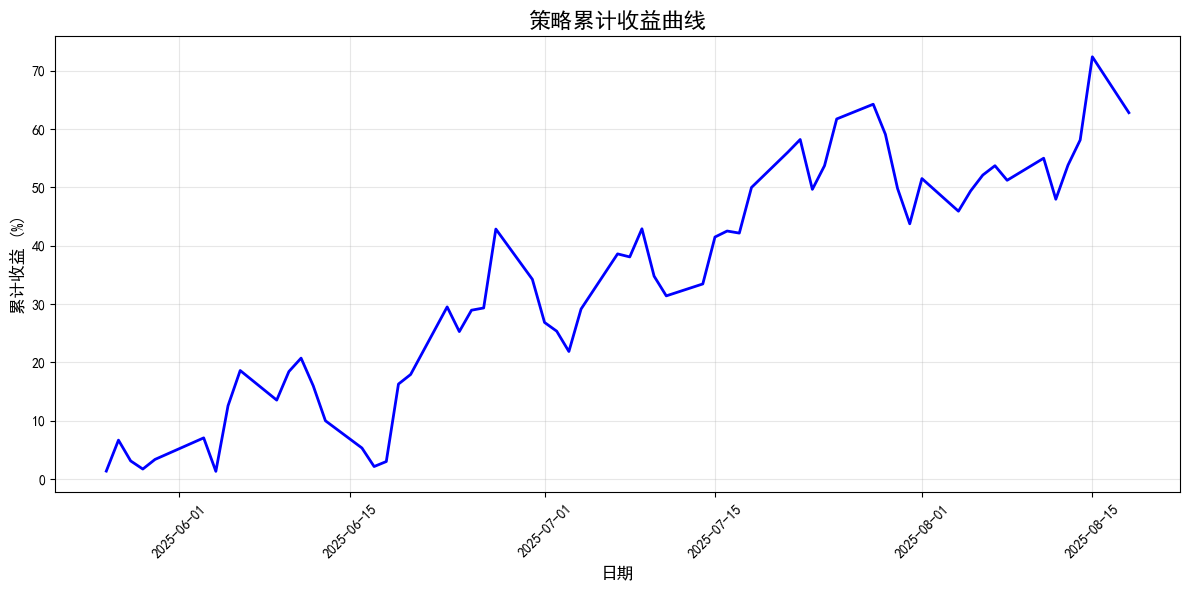

In [11]:

# 绘制累计收益曲线
plt.figure(figsize=(12, 6))
plt.plot(BackTest['date'], BackTest['cumulative_returns_pct'], linewidth=2, color='blue')
plt.title('策略累计收益曲线', fontsize=16, fontweight='bold')
plt.xlabel('日期', fontsize=12)
plt.ylabel('累计收益 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


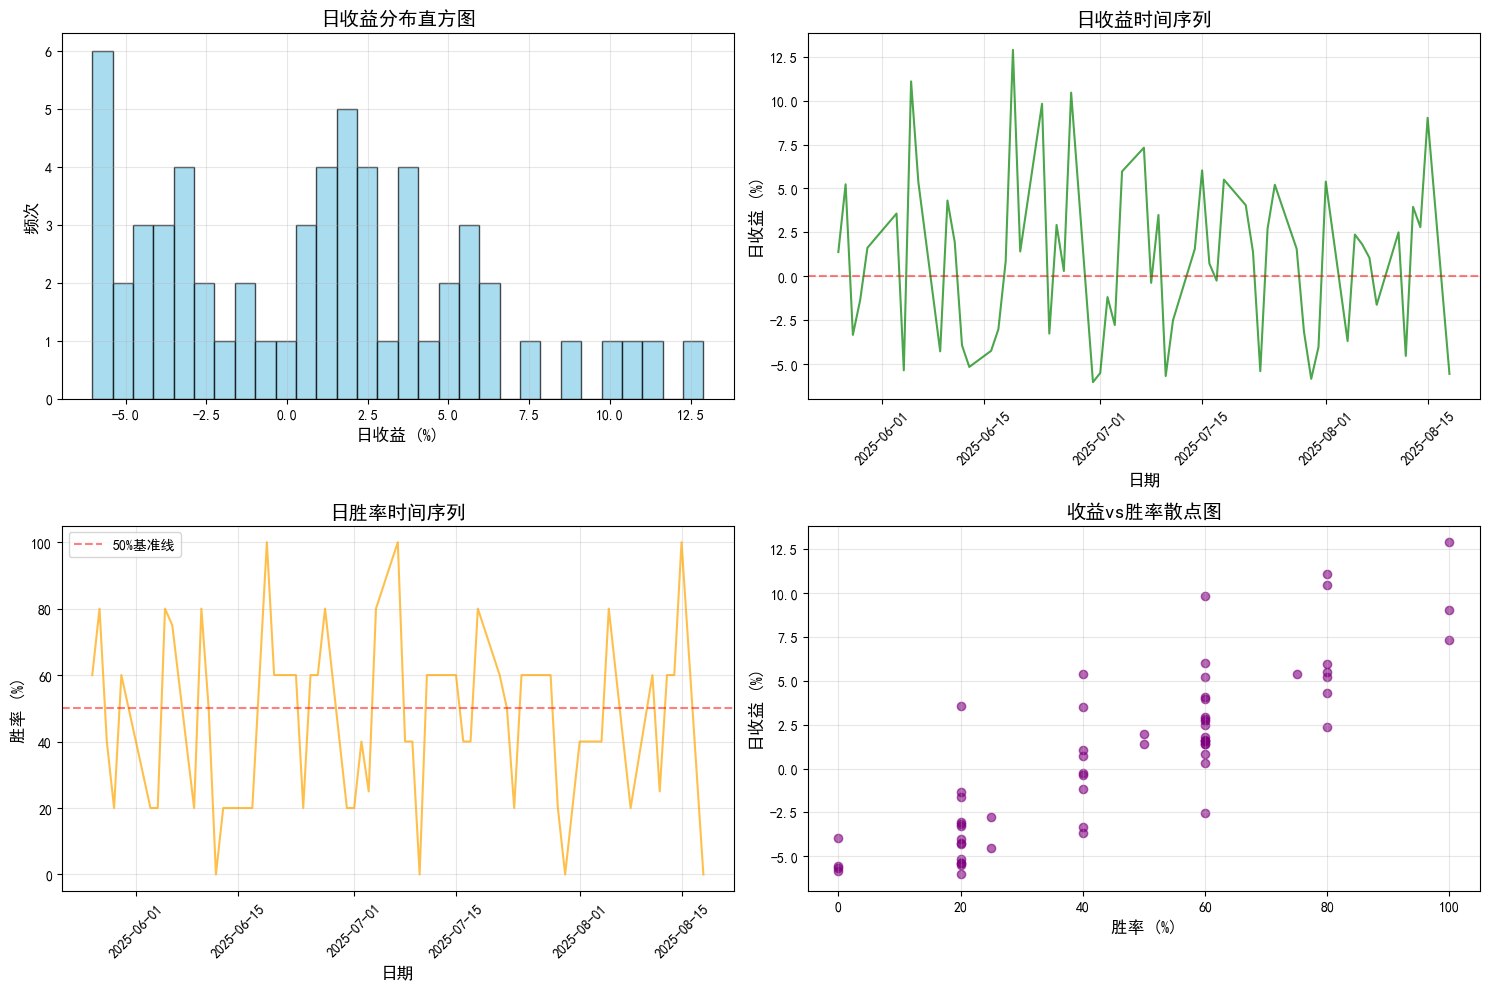

In [12]:

# 代码块4：综合分析图
plt.figure(figsize=(15, 10))

# 日收益分布直方图
plt.subplot(2, 2, 1)
plt.hist(BackTest['avgrtn']*100, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('日收益分布直方图', fontsize=14, fontweight='bold')
plt.xlabel('日收益 (%)', fontsize=12)
plt.ylabel('频次', fontsize=12)
plt.grid(True, alpha=0.3)


# 日收益时间序列
plt.subplot(2, 2, 2)
plt.plot(BackTest['date'], BackTest['avgrtn']*100, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.title('日收益时间序列', fontsize=14, fontweight='bold')
plt.xlabel('日期', fontsize=12)
plt.ylabel('日收益 (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 胜率时间序列
plt.subplot(2, 2, 3)
plt.plot(BackTest['date'], BackTest['winpct']*100, alpha=0.7, color='orange')
plt.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50%基准线')
plt.title('日胜率时间序列', fontsize=14, fontweight='bold')
plt.xlabel('日期', fontsize=12)
plt.ylabel('胜率 (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 收益vs胜率散点图
plt.subplot(2, 2, 4)
plt.scatter(BackTest['winpct']*100, BackTest['avgrtn']*100, alpha=0.6, color='purple')
plt.title('收益vs胜率散点图', fontsize=14, fontweight='bold')
plt.xlabel('胜率 (%)', fontsize=12)
plt.ylabel('日收益 (%)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


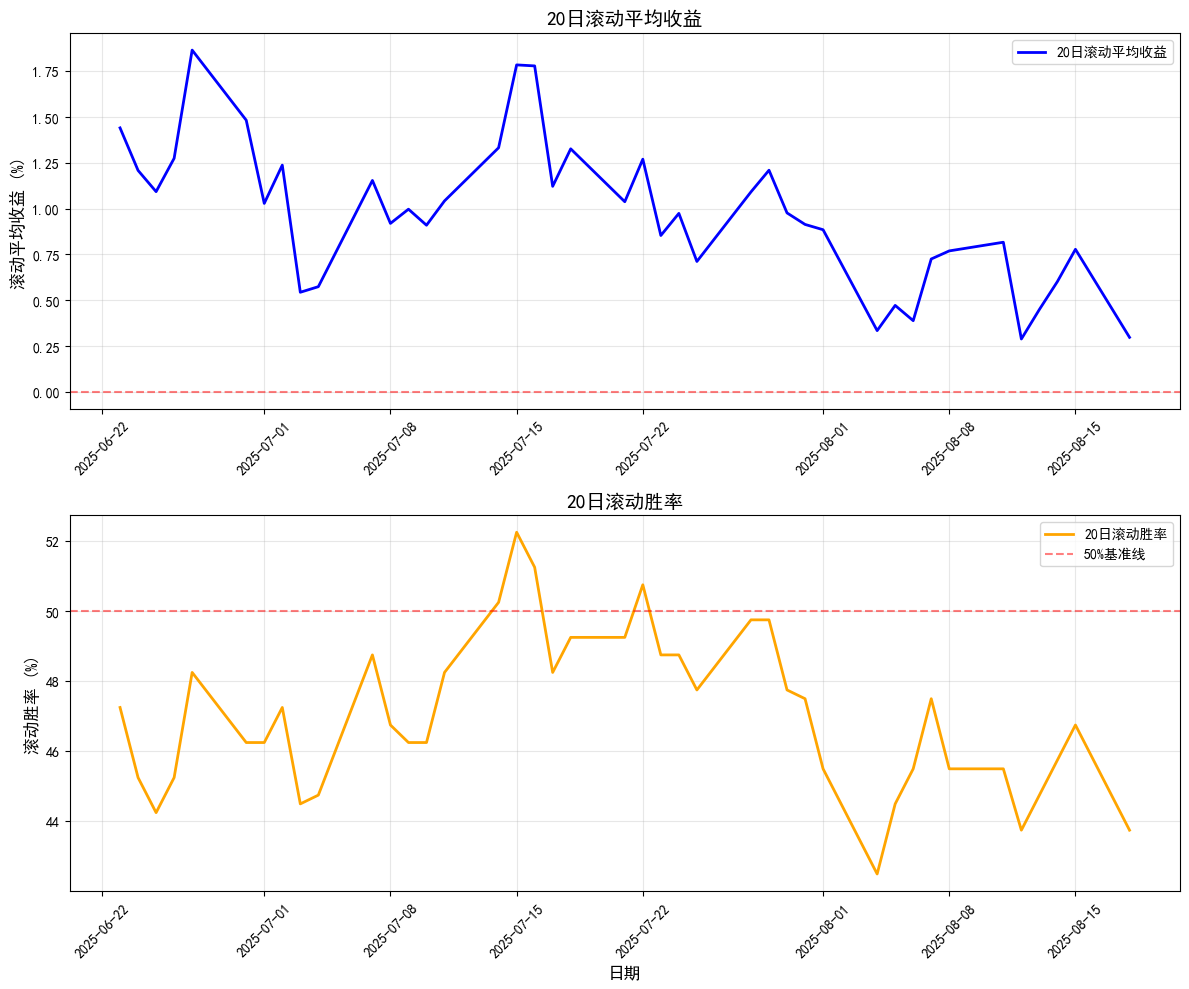

In [13]:

# 代码块5：滚动窗口分析
window_size = 20
BackTest['rolling_avg_return'] = BackTest['avgrtn'].rolling(window=window_size).mean()
BackTest['rolling_win_rate'] = BackTest['winpct'].rolling(window=window_size).mean()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.plot(BackTest['date'], BackTest['rolling_avg_return']*100, linewidth=2, color='blue', 
         label=f'{window_size}日滚动平均收益')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax1.set_title(f'{window_size}日滚动平均收益', fontsize=14, fontweight='bold')
ax1.set_ylabel('滚动平均收益 (%)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

ax2.plot(BackTest['date'], BackTest['rolling_win_rate']*100, linewidth=2, color='orange', 
         label=f'{window_size}日滚动胜率')
ax2.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50%基准线')
ax2.set_title(f'{window_size}日滚动胜率', fontsize=14, fontweight='bold')
ax2.set_xlabel('日期', fontsize=12)
ax2.set_ylabel('滚动胜率 (%)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [14]:

# 代码块6：绩效总结
print("=" * 50)
print("策略绩效总结报告")
print("=" * 50)

total_days = len(BackTest)
positive_days = len(BackTest[BackTest['avgrtn'] > 0])
negative_days = len(BackTest[BackTest['avgrtn'] < 0])

# 盈亏比计算
positive_returns = BackTest[BackTest['avgrtn'] > 0]['avgrtn']
negative_returns = BackTest[BackTest['avgrtn'] < 0]['avgrtn']
# 年化收益率计算
total_return = BackTest['cumulative_returns'].iloc[-1]
trading_days = len(BackTest)
annual_return = (1 + total_return) ** (252 / trading_days) - 1


if len(positive_returns) > 0 and len(negative_returns) > 0:
    avg_win = positive_returns.mean()
    avg_loss = abs(negative_returns.mean())
    profit_loss_ratio = avg_win / avg_loss if avg_loss != 0 else float('inf')
else:
    profit_loss_ratio = 0

print(f"总交易日数: {total_days}")
print(f"盈利日数: {positive_days} ({positive_days/total_days*100:.2f}%)")
print(f"亏损日数: {negative_days} ({negative_days/total_days*100:.2f}%)")
print(f"平均日收益: {BackTest['avgrtn'].mean()*100:.4f}%")
print(f"最终累计收益: {BackTest['cumulative_returns'].iloc[-1]*100:.4f}%")
print(f"年化收益率: {annual_return*100:.4f}%")
print(f"平均日胜率: {BackTest['winpct'].mean()*100:.4f}%")

sharpe_ratio = BackTest['avgrtn'].mean() / BackTest['avgrtn'].std() * np.sqrt(252)
max_drawdown = ((BackTest['cumulative_returns']-BackTest['cumulative_returns'].expanding().max())).min()

print(f"年化夏普比率: {sharpe_ratio:.4f}")
print(f"最大回撤: {max_drawdown*100:.4f}%")
print(f"盈亏比: {profit_loss_ratio:.4f}")
print(f"平均盈利: {avg_win*100:.4f}%")
print(f"平均亏损: {avg_loss*100:.4f}%")
print("=" * 50) 

策略绩效总结报告
总交易日数: 60
盈利日数: 35 (58.33%)
亏损日数: 25 (41.67%)
平均日收益: 0.9252%
最终累计收益: 62.8225%
年化收益率: 674.8201%
平均日胜率: 46.7500%
年化夏普比率: 3.0829
最大回撤: -20.9903%
盈亏比: 1.1449
平均盈利: 4.2169%
平均亏损: 3.6833%
